# Case przedsiębiorstwa PITU

## Zaawansowane Modelowanie Symulacyjne 

### Spis treści
1. Podsumowanie <br>
2. Opis organizacji oraz problemu, który ma być analizowany metodą symulacyjną <br>
3. Sprawdzenie danych i budowa symulacji <br>
4. Analiza wrażliwości i wyniki analizy <br>
5. Wnioski i zalecenia <br>


# 1. Podsumowanie

Raport zawiera model symulacyjny wraz z przeprowadzoną analizą problemu związanego z działalnością przedsiębiorstwa ubezpieczeniowego PITU. Celem raportu jest wyznaczenie wysokości składek ubezpieczenia tak, aby zminimalizować prawdopodobieństwo bankructwa firmy. W raporcie przedstawiono również wyniki analizy skutków zmiany kluczowych parametrów i zmiany niektórych założeń analizy. Szczegółowy opis organizacji i problemu znajduję się sekcji numer 2. <br>
<br>
Wyniki:  <br>

1. Z przeprowadzonej analizy wynika, że aby prawdopodobieństwo bankructwa wynosiło poniżej 1% przy danej wartości nadwyżki równej 10 000 zł, składka ubezpieczeniowa powinna wynosić co najmniej 1380 zł.  <br>
2. Wysokość składki można obniżyć nie zwiększając prawdopodobieństwa ruiny, przez zwiększenie nadwyżki. Dlatego wraz z poprawiającą się sytuacją przedsiębiorstwa zalecane jest zwiększenie nadwyżki początkowej (jeśli sytuacja na to pozwala), wtedy możliwe będzie zmniejszenie składki, co może zachęcić nowych klientów do wykupienia ubezpieczenia w firmie PITU.  <br>
3. Chcąc otrzymać wynik końcowy przedsiębiorstwa na poziomie nadwyżki początkowej równej 10 000 zł, składka powinna wynosić około 380 zł. Należy jednak pamiętać, że przy takiej wysokości składki prawdopodobieństwo bankructwa jest bardzo duże i wynosi ono około 85%. Dlatego rekomenduje się ustalenie wyższej składki.  <br>
4. Wyniki symulacji zależą od liczby powtórzeń symulacji. Z naszej analizy wynika, że średni wynik końcowy zaczyna stabilizować swoją wartość od 4000 powtórzeń. Dalsze zwiększanie liczby powtórzeń nie wpływa na zwiększenie stabilności wyników. Dlatego rekomenduje się ustalenie liczby powtórzeń w okolicach 4000. Dalsze zwiększanie tej liczby może powodować spowolnienie działania symulacji bez znaczących korzyści. <br>

 

# 2. Opis organizacji oraz problemu, który ma być analizowany metodą symulacyjną 

## Kiedy ruina = RUINA ?

*opr. P. Wojewnik na podstawie:*

*„Optymalizacja portfela szkód” K. Saduś, M. Kwiecień, R. Lipiński* oraz *„Ubezpieczenia komunikacyjne firmy ABC” A. Kołota, M. Mączyńska*


Prezes zarządu zakładu ubezpieczeń PiTU S.A., Marcin R., zasłyszał, że Prezydent planuje naturalizować wszystkich chętnych z Dżydżykistanu. *No to teraz się zacznie*, pomyślał, *Dżydżykowie jeżdżą jak wariaci, wzrośnie szkodowość, a więc musimy podnieść dla nich ceny.* 

Marcin R. dzwoni do aktuariuszki – Aldony P., ale tu czeka go niespodzianka. *Mój synek zachorował... Grypa to nic wielkiego... Ale w świńskim wydaniu bywa niebezpieczna.* Marcin z bólem serca odsyła Aldonę do domu, a zlecenie dostaje Marek T., asystent Aldony. Pytanie brzmi: **czy składka 500 zł jest wystarczająca ?**

Dotychczasowe doświadczenia PiTU S.A. z Dżydżykami są następujące:

<table>
<tr></tr>
<tr><td>

| Liczba szkód    | Liczba polis
|-----------------|-------------
| 0               | 3 437
| 1               | 522
| 2               | 40
| 3               | 2
| 4               | 0
| 5               | 0

</td><td>

| Wielkość szkody | Liczba szkód
|-----------------|-------------
| -               | 0
| 100             | 0
| 200             | 2
| 500             | 27
| 1 000           | 52
| 2 000           | 115
| 5 000           | 203
| 10 000          | 106
| 20 000          | 42
| 40 000          | 14
| 50 000          | 0
| 55 000          | 0
| 60 000          | 1

</td></tr> </table>

Aldona rzuciła jeszcze przez telefon, że **liczbę szkód dobrze opisuje rozkład Poissona**, natomiast **wielkość szkód – rozkład log-normalny**. Z Marcina udało się wydusić **oczekiwaną liczbę klientów – 100** – oraz **aktualną nadwyżkę 10 000**.



# 3. Sprawdzenie danych i budowa symulacji

### Pierwszym krokiem jest import bibliotek, niezbędnych do przeprowadzenia analizy

In [1]:
import csv
import scipy as sc
import numpy
import pandas as pd
from math import exp, factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kstest
plt.style.use('seaborn-whitegrid')

## Dane - rozkłady, wyznaczanie parametrów

### Liczba szkód

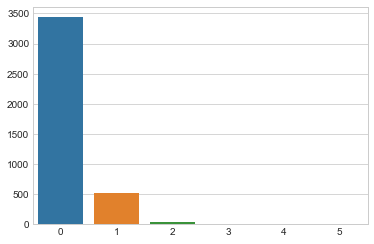

In [2]:
liczba_szkod = {0: 3437,
                1: 522,
                2: 40,
                3: 2,
                4: 0,
                5: 0}

sns.barplot(x=list(liczba_szkod.keys()),
            y=list(liczba_szkod.values()));
# or plt.bar(*zip(*liczba_szkod.items()))

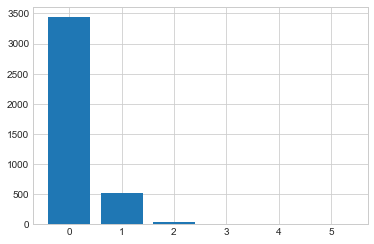

In [3]:
# Średnia liczba szkód
liczba_polis = sum(liczba_szkod.values())
srednia_liczba_szkod = (sum([x * y for x, y in liczba_szkod.items()]) /
                        liczba_polis)

# Czy liczba szkód ma faktycznie rozkład Poissona?
poisson_test = [sc.stats.poisson.pmf(i, srednia_liczba_szkod) *
                liczba_polis for i in range(len(liczba_szkod))]

plt.bar(list(liczba_szkod.keys()), poisson_test)
plt.show()

In [4]:
liczba_polis

4001

In [5]:
srednia_liczba_szkod

0.1519620094976256

Funkcja rozkładu prawdopodobieństwa w rozkładzie Poissona ze średnią $\lambda$
$$f(k,\lambda)=\frac{\lambda^ke^{-\lambda}}{k!}$$

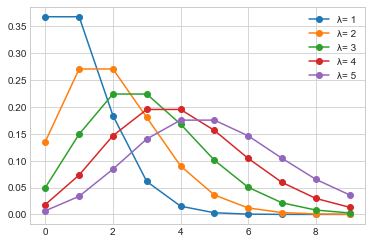

In [6]:
# Rozkład Poissona
for λ in [1, 2, 3, 4, 5]:
    plt.plot([λ**k*exp(-λ)/factorial(k)
              for k in range(10)], 'o-', label='λ= {}'.format(λ))
plt.legend();

In [7]:
# Test chi-kwadrat z biblioteki scipy pomoże odpowiedziec na pytanie
test1 = sc.stats.chisquare(list(liczba_szkod.values()), f_exp=poisson_test)
if test1[1] > 0.05:
    print("Brak podstaw do odrzucenia hipotezy zerowej")
else:
    print("Należy odrzucic hipoteze zerowa")

Brak podstaw do odrzucenia hipotezy zerowej


### Wielkość szkód

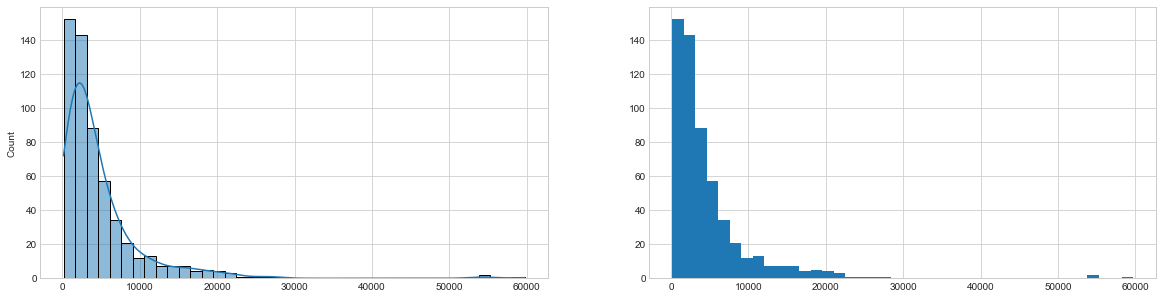

Średnia wielkość szkód: 4742


In [9]:
szkody = []
with open('./szkody.txt', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=";")
    for row in reader:
        szkody.append(int(row[1]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
sns.histplot(szkody, bins=40, kde=True, ax=ax1)
ax2 = plt.hist(szkody, bins=40)
plt.show()

print("Średnia wielkość szkód:", round(numpy.mean(szkody)))

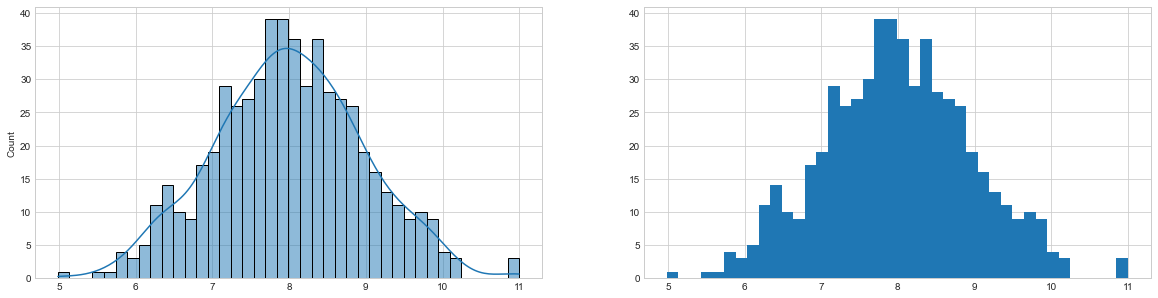

In [10]:
# Wielkość szkód ma rozkład log-normalny
szkody_ln = numpy.log(szkody)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
sns.histplot(szkody_ln, bins=40, kde=True,ax=ax1)
ax2 = plt.hist(szkody_ln, bins=40)
plt.show()

In [11]:
# ... czy faktycznie? test K-S
test2 = kstest(szkody_ln, sc.stats.norm.cdf,
               args=(numpy.mean(szkody_ln), numpy.std(szkody_ln)))
if test2[1] > 0.05:
    print("p-value wyniosło:", round(test2[1], 4),
          "- brak więc podstaw do odrzucenia hipotezy " +
          "o log-normalności rozkładu zmiennej")
else:
    print("należy odrzucic hipotezę zerowa")

p-value wyniosło: 0.9974 - brak więc podstaw do odrzucenia hipotezy o log-normalności rozkładu zmiennej


In [12]:
# Parametry wielkości szkód potrzebne do symulacji
SR_SZKODA_LN = numpy.mean(szkody_ln)
STD_SZKODA_LN = numpy.std(szkody_ln)

## Model symulacji

In [13]:
def model(liczba_klientow, srednia_liczba_szkod,
          sr_szkoda_ln, std_szkoda_ln, horyzont,
          nadwyzka, skladka, seed=-1):

    seed == -1 or sc.random.seed(seed)

    # Definiujemy daty umów klientow w symulacji
    daty_umow = [sc.random.randint(0, 364) for i in range(liczba_klientow)]
    kalendarz_wplat = [0]*365
    for dataUmowy in daty_umow:
        kalendarz_wplat[dataUmowy] += 1

    # Liczymy liczbę szkód przypadających na jednego klienta
    liczba_szkod_klienta = sc.random.poisson(srednia_liczba_szkod,
                                             liczba_klientow)

    # i ustalamy daty wyplaty dla wszystkich polis
    kalendarz_wyplat = [0]*(365*horyzont)
    for k in range(liczba_klientow):
        for s in range(liczba_szkod_klienta[k]):
            data_wyplaty = sc.random.randint(daty_umow[k], horyzont*365)
            kalendarz_wyplat[data_wyplaty] += 1

    # Analiza wyników firmy dla danego horyzontu czasowego i danych szkód:
    for dzien in range(365*horyzont):
        if dzien <= 364:
            nadwyzka += kalendarz_wplat[dzien] * skladka
        liczba_wyplat = kalendarz_wyplat[dzien]
        odszkodowania = 0
        if liczba_wyplat > 0:
            odszkodowania = sum(numpy.exp(sc.random.normal(sr_szkoda_ln,
                                                           std_szkoda_ln,
                                                           liczba_wyplat)))
        if nadwyzka < odszkodowania:
            return nadwyzka - odszkodowania
        
        nadwyzka -= odszkodowania
        
    return nadwyzka

### Funkcja wywołująca symulację *n* razy

In [14]:
def wywolanie(nadwyzka, skladka, liczba_powtorzen,
              liczba_klientow, srednia_liczba_szkod,
              sr_szkoda_ln, std_szkoda_ln, horyzont):
    wynik = []
    bankructwo = 0
    wynik_dodatni = []
    for seed in range(liczba_powtorzen):
        wynik.append(model(liczba_klientow, srednia_liczba_szkod,
                           sr_szkoda_ln, std_szkoda_ln, horyzont,
                           nadwyzka, skladka, seed))
        if wynik[seed] < 0:
            bankructwo += 1
        if wynik[seed] > 0:
            wynik_dodatni.append(wynik[seed])
    sredni_wynik = numpy.mean(wynik_dodatni)
    prawd_bankr = bankructwo / liczba_powtorzen
    return [bankructwo, prawd_bankr, sredni_wynik]

## Przeprowadzenie symulacji

Nadwyżka:  10000 Składka:  500 Liczba ruin:  66 Średni wynik:  12981 Prawd_bankr:  0.66
Nadwyżka:  10000 Składka:  600 Liczba ruin:  54 Średni wynik:  18284 Prawd_bankr:  0.54
Nadwyżka:  10000 Składka:  700 Liczba ruin:  39 Średni wynik:  22540 Prawd_bankr:  0.39
Nadwyżka:  10000 Składka:  800 Liczba ruin:  27 Średni wynik:  27950 Prawd_bankr:  0.27
Nadwyżka:  10000 Składka:  900 Liczba ruin:  21 Średni wynik:  35269 Prawd_bankr:  0.21


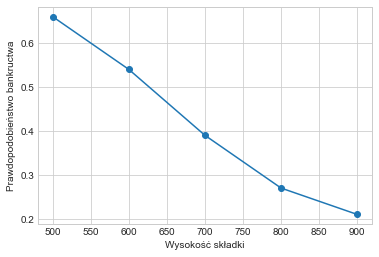

In [15]:
# Zmienne i parametry w modelu:
sr_wynik = []  # Średni wynik finansowy firmy
wysokosc_skladki = []
prawd_bankr = []
liczba_ruin = []

LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100
HORYZONT = 2  # Długość obowiązywania umowy - zakładamy 2 lata

for nadwyzka in range(10000, 20000, 10000):
    for skladka in range(500, 1000, 100):
        wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                 srednia_liczba_szkod, SR_SZKODA_LN,
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_skladki.append(skladka)
        liczba_ruin.append(wartosc_f_xy[0])
        prawd_bankr.append(wartosc_f_xy[1])
        sr_wynik.append(wartosc_f_xy[2])
        print("Nadwyżka: ", nadwyzka, "Składka: ", skladka,
              "Liczba ruin: ", wartosc_f_xy[0], "Średni wynik: ",
              round(wartosc_f_xy[2]), "Prawd_bankr: ", wartosc_f_xy[1])


plt.plot(wysokosc_skladki, prawd_bankr,'o-')
plt.ylabel('Prawdopodobieństwo bankructwa')
plt.xlabel('Wysokość składki')

plt.show()

# 4. Analiza wrażliwości i wyniki analizy

## 4.1 Jaką ustalić składkę OC, aby prawdopodobieństwo ruiny było mniejsze niż 0,01? <br>(analiza 1 parametru)

Biorąc pod uwagę obserwacje z podpunktu trzeciego, sprawdzono wysokość prawdopodobieństwa bankructwa przy składce OC mieszczącej się w przedziale 900 zł - 1500 zł. Zmiana składki przy kolejnych powtórzeniach wynosiła dla uproszczenia 10 zł. Przypuszczalnie, przy kwocie składki OC mieszczącej się w powyższym przedziale, prawdopodobieństwo ruiny powinno wynosić < 1%.

### Przeprowadzenie symulacji

In [16]:
# Zmienne i parametry w modelu:
sr_wynik = []  # Średni wynik finansowy firmy
wysokosc_skladki = []
prawd_bankr = []
liczba_ruin = []

LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100
HORYZONT = 2  # Długość obowiązywania umowy - zakładamy 2 lata

for nadwyzka in range(10000, 20000, 10000):
    for skladka in range(900, 1500, 20):
        wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                 srednia_liczba_szkod, SR_SZKODA_LN,
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_skladki.append(skladka)
        liczba_ruin.append(wartosc_f_xy[0])
        prawd_bankr.append(wartosc_f_xy[1])
        sr_wynik.append(wartosc_f_xy[2])
        print("Nadwyżka: ", nadwyzka, "Składka: ", skladka,
              "Liczba ruin: ", wartosc_f_xy[0], "Średni wynik: ",
              round(wartosc_f_xy[2]), "Prawd_bankr: ", wartosc_f_xy[1])

Nadwyżka:  10000 Składka:  900 Liczba ruin:  21 Średni wynik:  35269 Prawd_bankr:  0.21
Nadwyżka:  10000 Składka:  920 Liczba ruin:  21 Średni wynik:  37269 Prawd_bankr:  0.21
Nadwyżka:  10000 Składka:  940 Liczba ruin:  20 Średni wynik:  38785 Prawd_bankr:  0.2
Nadwyżka:  10000 Składka:  960 Liczba ruin:  18 Średni wynik:  39793 Prawd_bankr:  0.18
Nadwyżka:  10000 Składka:  980 Liczba ruin:  17 Średni wynik:  41297 Prawd_bankr:  0.17
Nadwyżka:  10000 Składka:  1000 Liczba ruin:  16 Średni wynik:  42800 Prawd_bankr:  0.16
Nadwyżka:  10000 Składka:  1020 Liczba ruin:  14 Średni wynik:  43792 Prawd_bankr:  0.14
Nadwyżka:  10000 Składka:  1040 Liczba ruin:  12 Średni wynik:  44794 Prawd_bankr:  0.12
Nadwyżka:  10000 Składka:  1060 Liczba ruin:  9 Średni wynik:  45291 Prawd_bankr:  0.09
Nadwyżka:  10000 Składka:  1080 Liczba ruin:  8 Średni wynik:  46999 Prawd_bankr:  0.08
Nadwyżka:  10000 Składka:  1100 Liczba ruin:  6 Średni wynik:  47970 Prawd_bankr:  0.06
Nadwyżka:  10000 Składka:  112

Prawdopodobieństwo bankructwa spada wraz ze wzrostem składki, co jest logiczne. Osiąga wartość mniejszą niż 1%, gdy kwota składki OC wynosi minimum 1380 zł (przy skoku składki co 10 zł oraz stałej nadwyżce, wynoszącej 10000 zł). Wizualizacja wpływu wysokości składki OC na spadek prawdopodobieństwa ruiny została przedstawiona na poniższym wykresie (Rys. 1). Pomarańczowa linia na wykresie (Rys. 1) pokazuje graniczną wartość ryzyka bankructwa, czyli 1%.

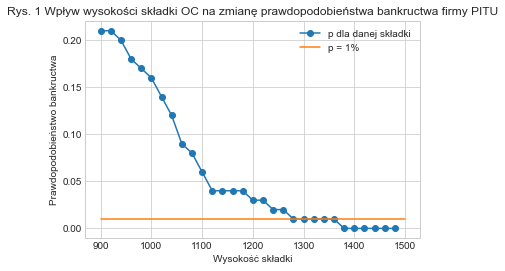

In [17]:
# Wizualizacja zbioru danych
x=[900,1500]
y=[0.01,0.01]
plt.plot(wysokosc_skladki, prawd_bankr,'o-')
plt.plot(x,y)
plt.ylabel('Prawdopodobieństwo bankructwa')
plt.xlabel('Wysokość składki')
plt.title('Rys. 1 Wpływ wysokości składki OC na zmianę prawdopodobieństwa bankructwa firmy PITU')
plt.legend(['p dla danej składki','p = 1%'])
plt.show()

## 4.2 Jaka powinna być nadwyżka i składka, żeby prawdopodobieństwo ruiny było mniejsze niż 0,01? (analiza 2 parametrów)


W powyższym przykładzie, przy składce OC w wysokości 1380 zł, prawdopodobieństwo bankructwa firmy wyniosło 0%. Możliwe jest jednak obniżenie wysokości składki OC, przy utrzymaniu zerowego prawdopodobieństwa ruiny, lecz wymaga to także zmiany kwoty nadwyżki. 

Wpływ dwóch parametrów, jakimi są nadwyżka i składka OC, na zmianę prawdopodobieństwa ruiny, można zaobserwować na tzw. heatmapie z biblioteki Seaborn. Przedział oraz wysokość skoku tych parametrów mogą być dowolnie modyfikowane. 

Na poniższym wykresie (Rys. 2) została zwizualizowana:
* zmiana prawdopodobieństwa ruiny, mieszczącego się w przedziale 0% - 6%
* przy uwzględnieniu kwot nadwyżki z przedziału 10000 zł - 13000 zł i skoku co 250 zł w kolejnych powtórzeniach
* przy uwzględnieniu kwot składki z przedziału 1100 zł - 1500 zł i jej skoku co 25 zł 

### Przeprowadzenie symulacji

In [18]:
# Zmienne i parametry w modelu:
sr_wynik = []  # Średni wynik finansowy firmy
wysokosc_skladki = []
wysokosc_nadwyzki = []
prawd_bankr = []
liczba_ruin = []

LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100
HORYZONT = 2  # Długość obowiązywania umowy - zakładamy 2 lata

for nadwyzka in range(10000, 13000, 250):
    for skladka in range(1100, 1500, 25):
        wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                 srednia_liczba_szkod, SR_SZKODA_LN,
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_nadwyzki.append(nadwyzka)
        wysokosc_skladki.append(skladka)
        liczba_ruin.append(wartosc_f_xy[0])
        prawd_bankr.append(wartosc_f_xy[1])
        sr_wynik.append(wartosc_f_xy[2])
        print("Nadwyżka: ", nadwyzka, "Składka: ", skladka,
              "Liczba ruin: ", wartosc_f_xy[0], "Średni wynik: ",
              round(wartosc_f_xy[2]), "Prawd_bankr: ", wartosc_f_xy[1])



Nadwyżka:  10000 Składka:  1100 Liczba ruin:  6 Średni wynik:  47970 Prawd_bankr:  0.06
Nadwyżka:  10000 Składka:  1125 Liczba ruin:  4 Średni wynik:  49448 Prawd_bankr:  0.04
Nadwyżka:  10000 Składka:  1150 Liczba ruin:  4 Średni wynik:  51948 Prawd_bankr:  0.04
Nadwyżka:  10000 Składka:  1175 Liczba ruin:  4 Średni wynik:  54448 Prawd_bankr:  0.04
Nadwyżka:  10000 Składka:  1200 Liczba ruin:  3 Średni wynik:  56367 Prawd_bankr:  0.03
Nadwyżka:  10000 Składka:  1225 Liczba ruin:  3 Średni wynik:  58867 Prawd_bankr:  0.03
Nadwyżka:  10000 Składka:  1250 Liczba ruin:  2 Średni wynik:  60765 Prawd_bankr:  0.02
Nadwyżka:  10000 Składka:  1275 Liczba ruin:  1 Średni wynik:  62631 Prawd_bankr:  0.01
Nadwyżka:  10000 Składka:  1300 Liczba ruin:  1 Średni wynik:  65131 Prawd_bankr:  0.01
Nadwyżka:  10000 Składka:  1325 Liczba ruin:  1 Średni wynik:  67631 Prawd_bankr:  0.01
Nadwyżka:  10000 Składka:  1350 Liczba ruin:  1 Średni wynik:  70131 Prawd_bankr:  0.01
Nadwyżka:  10000 Składka:  1375 

Nadwyżka:  11250 Składka:  1450 Liczba ruin:  0 Średni wynik:  80657 Prawd_bankr:  0.0
Nadwyżka:  11250 Składka:  1475 Liczba ruin:  0 Średni wynik:  83157 Prawd_bankr:  0.0
Nadwyżka:  11500 Składka:  1100 Liczba ruin:  5 Średni wynik:  48962 Prawd_bankr:  0.05
Nadwyżka:  11500 Składka:  1125 Liczba ruin:  4 Średni wynik:  50948 Prawd_bankr:  0.04
Nadwyżka:  11500 Składka:  1150 Liczba ruin:  4 Średni wynik:  53448 Prawd_bankr:  0.04
Nadwyżka:  11500 Składka:  1175 Liczba ruin:  4 Średni wynik:  55948 Prawd_bankr:  0.04
Nadwyżka:  11500 Składka:  1200 Liczba ruin:  3 Średni wynik:  57867 Prawd_bankr:  0.03
Nadwyżka:  11500 Składka:  1225 Liczba ruin:  2 Średni wynik:  59765 Prawd_bankr:  0.02
Nadwyżka:  11500 Składka:  1250 Liczba ruin:  2 Średni wynik:  62265 Prawd_bankr:  0.02
Nadwyżka:  11500 Składka:  1275 Liczba ruin:  1 Średni wynik:  64131 Prawd_bankr:  0.01
Nadwyżka:  11500 Składka:  1300 Liczba ruin:  1 Średni wynik:  66631 Prawd_bankr:  0.01
Nadwyżka:  11500 Składka:  1325 Li

Nadwyżka:  12750 Składka:  1400 Liczba ruin:  0 Średni wynik:  77157 Prawd_bankr:  0.0
Nadwyżka:  12750 Składka:  1425 Liczba ruin:  0 Średni wynik:  79657 Prawd_bankr:  0.0
Nadwyżka:  12750 Składka:  1450 Liczba ruin:  0 Średni wynik:  82157 Prawd_bankr:  0.0
Nadwyżka:  12750 Składka:  1475 Liczba ruin:  0 Średni wynik:  84657 Prawd_bankr:  0.0


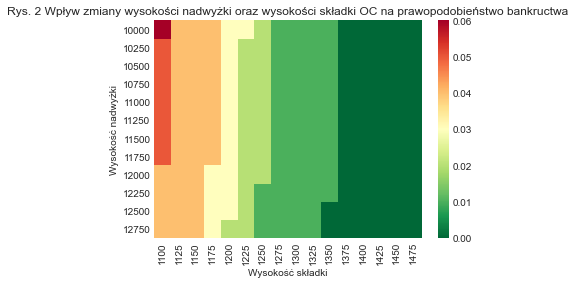

In [19]:
# Wizualizacja zbioru danych

df1 = pd.DataFrame(list(zip(wysokosc_nadwyzki, prawd_bankr, wysokosc_skladki)),
                   columns=['wysokosc_nadwyzki','prawd_bankr','wysokosc_skladki']
                  )

df2 = pd.pivot_table(data=df1,
                    index='wysokosc_nadwyzki',
                    values='prawd_bankr',
                    columns='wysokosc_skladki')

sns.heatmap(df2,cmap="RdYlGn_r")
plt.ylabel('Wysokość nadwyżki')
plt.xlabel('Wysokość składki')
plt.title('Rys. 2 Wpływ zmiany wysokości nadwyżki oraz wysokości składki OC na prawopodobieństwo bankructwa')

plt.show()

Na powyższej heatmapie (Rys. 2) wyraźnie widoczna jest granica zmiany prawdopodobieństwa bankructwa z 1% na 0%. Prawdopodobieństwo wynoszące 0% zostało zaznaczone kolorem ciemnozielonym. Widoczna jest  też zależność, że wraz ze wzrostem nadwyżki można zmniejszyć składkę przy zachowaniu tego samego ryzyka bankructwa. Przy wzroście nadwyżki z 12 250 zł na 12 500 zł możliwe jest obniżenie wysokości składki OC z 1375 zł do 1350 zł i jednoczesne zachowanie 0% prawdopodobieństwa ruiny.

## 4.3 Kiedy nadwyżka końcowa będzie równa początkowej? Oszacuj na podstawie modelu regresji.

### 4.3.1 Budowa modelu
 Jeśli wartość $y$ jest zależna od wartości $x$, można przedstawić tę zależność jako funkcję $f(x)$ i oszacować wartości $y$.
 <br> 
 Funkcja $f(x)$ przyjmuje postać $y = ax + b$.

In [20]:
# Tworzenie zbioru z danymi
sr_wynik = []  # Średni wynik finansowy firmy
wysokosc_skladki = []

LICZBA_POWTORZEN = 100
LICZBA_KLIENTOW = 100
HORYZONT = 2  # Długość obowiązywania umowy - zakładamy 2 lata

for nadwyzka in range(10000, 20000, 10000):
    for skladka in range(200, 1000, 10):
        wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                 srednia_liczba_szkod, SR_SZKODA_LN,
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_skladki.append(skladka) 
        sr_wynik.append(wartosc_f_xy[2])
        print("Nadwyżka: ", nadwyzka, "Składka: ", skladka,
              "Średni wynik: ", round(wartosc_f_xy[2]))

Nadwyżka:  10000 Składka:  200 Średni wynik:  4585
Nadwyżka:  10000 Składka:  210 Średni wynik:  5585
Nadwyżka:  10000 Składka:  220 Średni wynik:  6585
Nadwyżka:  10000 Składka:  230 Średni wynik:  5873
Nadwyżka:  10000 Składka:  240 Średni wynik:  6873
Nadwyżka:  10000 Składka:  250 Średni wynik:  7873
Nadwyżka:  10000 Składka:  260 Średni wynik:  8873
Nadwyżka:  10000 Składka:  270 Średni wynik:  9873
Nadwyżka:  10000 Składka:  280 Średni wynik:  8763
Nadwyżka:  10000 Składka:  290 Średni wynik:  9763
Nadwyżka:  10000 Składka:  300 Średni wynik:  10763
Nadwyżka:  10000 Składka:  310 Średni wynik:  8634
Nadwyżka:  10000 Składka:  320 Średni wynik:  6873
Nadwyżka:  10000 Składka:  330 Średni wynik:  6706
Nadwyżka:  10000 Składka:  340 Średni wynik:  7706
Nadwyżka:  10000 Składka:  350 Średni wynik:  8112
Nadwyżka:  10000 Składka:  360 Średni wynik:  9112
Nadwyżka:  10000 Składka:  370 Średni wynik:  9438
Nadwyżka:  10000 Składka:  380 Średni wynik:  10438
Nadwyżka:  10000 Składka:  39

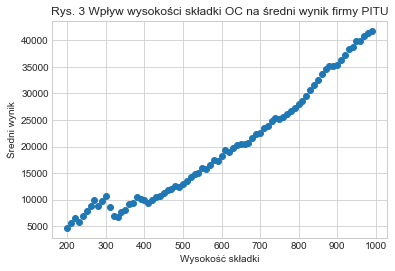

In [21]:
# wizualizacja zbioru danych
plt.scatter(wysokosc_skladki, sr_wynik)
plt.title('Rys. 3 Wpływ wysokości składki OC na średni wynik firmy PITU')
plt.ylabel('Średni wynik')
plt.xlabel('Wysokość składki')
plt.show()

Patrząc na powyższy wykres (Rys. 3) można powiedzieć, że symulacja zachowuje się zgodnie z intuicją i wraz ze wzrostem składki OC, rośnie również średni wynik przedsiębiorstwa. Przyglądając się danym, możemy również założyć liniowość funkcji regresji i zbudować model regresji liniowej.
<br>
<br>
W celu stworzenia modelu regresji wykorzystano bibliotekę sklearn.


In [22]:
#import bibliotek
from sklearn.linear_model import LinearRegression

In [23]:
# tworzenie zbioru treningowego
x_train = numpy.array(wysokosc_skladki).reshape(-1, 1)
y_train = numpy.array(sr_wynik)

In [24]:
# tworzenie i trenowanie modelu 
linRegModel = LinearRegression().fit(x_train, y_train)

r2 = linRegModel.score(x_train, y_train) #Współczynnnik determinacji R^2
a = linRegModel.coef_ # współczynik przy x
b = linRegModel.intercept_ # wyraz wolny

print('Współczynnnik determinacji R^2: ', r2)
print('Wspólczynnik przy x: ', a) 
print('Wyraz wolny b: ', b) 

Współczynnnik determinacji R^2:  0.9533142867260539
Wspólczynnik przy x:  [45.67081779]
Wyraz wolny b:  -7325.615109674673



Z przeprowadzonych obliczeń wynika, że w zaokrągleniu współczynnik przy $ a = 45,67 $, a wyraz wolny $b = -7325,62$.
<br>
Współczynnik determinacji $R^2$ = 0,95, co świadczy o bardzo dobrym dopasowaniu prostej regresji do danych ($R^2$ przyjmuje wartości od 0 do 1, gdzie 1 oznacza idealne dopasowanie).



In [25]:
# ponowne wywołanie symulacji w celu stworzenia zbioru testowego
wysokosc_skladki_test = []
sr_wynik_test = []
for nadwyzka in range(10000, 20000, 10000):
    for skladka in range(205, 1055, 50):
        wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                 LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                 srednia_liczba_szkod, SR_SZKODA_LN,
                                 STD_SZKODA_LN, HORYZONT)
        wysokosc_skladki_test.append(skladka)
        sr_wynik_test.append(wartosc_f_xy[2])
       
x_test = numpy.array(wysokosc_skladki_test).reshape((-1, 1))
y_test = numpy.array(sr_wynik_test) 

# predykcja średniego wyniku
y_pred = linRegModel.predict(x_test)


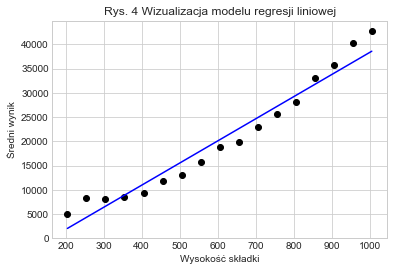

In [26]:
# Wizualizacja modelu regresji liniowej
plt.scatter(x_test , y_test,  color='black')
plt.plot(x_test, y_pred, color='blue')
plt.title('Rys. 4 Wizualizacja modelu regresji liniowej')
plt.ylabel('Średni wynik')
plt.xlabel('Wysokość składki')
plt.show()

Czarne punkty na powyższym wykresie (Rys. 4) reprezentują dane ze zbioru testowego, natomiast niebiebieska linia przewidywane wartości średniego wyniku, w zależności od wysokości składki ubezpieczenia.

### 4.3.2  Obliczenie wysokości składki, przy której nadwyżka końcowa jest równa początkowej.
Funkcja regresji ma postać:<br> $y = ax + b$, <br>
więc aby obliczyć wysokość składki, przy której $y = 10000$, musimy przekształcić funkcję do postaci: <br> $x = (y - b)/a$


In [27]:
# obliczenie wartości składki, dla której nadwyżka końcowa równa się założonej kwocie
nadwyzka_konc = 10000 

szukana_skladka = (nadwyzka_konc - b)/ a
print('Szukana wartość składki: ', round(szukana_skladka[0]))

Szukana wartość składki:  379


Nadwyżka końcowa będzie równa nadwyżce początkowej, przy kwocie składki OC równej 379 zł. Wynik ten jednak nie jest akceptowalny ze względu na duże ryzyko bankructwa przedsiębiorstwa przy takiej wartości składki.

## 4.4 Jak liczba symulacji wpływa na wyniki?

Poniżej zostało przedstawionych kilka symulacji z różną liczbą powtórzeń, aby sprawdzić jak wpływa to na wyniki.

### 4.4.1 Funkcja wywołująca symulację *n* razy

In [28]:
def wywolanie(nadwyzka, skladka, liczba_powtorzen,
              liczba_klientow, srednia_liczba_szkod,
              sr_szkoda_ln, std_szkoda_ln, horyzont):
    wynik = []
    bankructwo = 0
    wynik_dodatni = []
    for seed in range(liczba_powtorzen):
        wynik.append(model(liczba_klientow, srednia_liczba_szkod,
                           sr_szkoda_ln, std_szkoda_ln, horyzont,
                           nadwyzka, skladka, seed))
        if wynik[seed] < 0:
            bankructwo += 1
        if wynik[seed] > 0:
            wynik_dodatni.append(wynik[seed])
    sredni_wynik = numpy.mean(wynik_dodatni)
    odchy_stand = numpy.std(wynik_dodatni)
    wspol_zmien = numpy.std(wynik_dodatni)/numpy.mean(wynik_dodatni) * 100 
    prawd_bankr = bankructwo / liczba_powtorzen
    return [bankructwo, prawd_bankr, sredni_wynik, odchy_stand, wspol_zmien]

### Przeprowadzenie symulacji 
* dla liczby powtórzeń w przedziale 100 - 10000, z przeskokiem co 100 powtórzeń
* uwzględniając odchylenie standardowe oraz współczynnik zmienności przy stałej nadwyżce = 10000 zł i składce = 1300 zł


In [29]:
# Zmienne i parametry w modelu:
sr_wynik = []  # Średni wynik finansowy firmy
wysokosc_skladki = []
prawd_bankr = []
liczba_ruin = []
odchy_stand = []
wspol_zmien = []
licz_pow = []

nadwyzka = 10000
skladka = 1300
LICZBA_KLIENTOW = 100
HORYZONT = 2  # Długość obowiązywania umowy - zakładamy 2 lata

for LICZBA_POWTORZEN in [10, 30, 50, 80, 100, 150, 200, 400, 600, 800, 1000, 2000, 4000, 6000, 8000, 10000]:
            wartosc_f_xy = wywolanie(nadwyzka, skladka,
                                     LICZBA_POWTORZEN, LICZBA_KLIENTOW,
                                     srednia_liczba_szkod, SR_SZKODA_LN,
                                     STD_SZKODA_LN, HORYZONT)
            licz_pow.append(LICZBA_POWTORZEN)
            wysokosc_skladki.append(skladka)
            liczba_ruin.append(wartosc_f_xy[0])
            prawd_bankr.append(wartosc_f_xy[1])
            sr_wynik.append(wartosc_f_xy[2])
            odchy_stand.append(wartosc_f_xy[3])
            wspol_zmien.append(wartosc_f_xy[4])
            print("Nadwyżka:", nadwyzka, "Składka:", skladka,
                  "Licz_ruin:", wartosc_f_xy[0], "Śr wynik:",
                  round(wartosc_f_xy[2]), "Prawd_bankr:", round(wartosc_f_xy[1], 3), "Odch_stand:", round(wartosc_f_xy[3], 3), "Wspol_zm:", round(wartosc_f_xy[4], 3))


Nadwyżka: 10000 Składka: 1300 Licz_ruin: 0 Śr wynik: 58413 Prawd_bankr: 0.0 Odch_stand: 23680.317 Wspol_zm: 40.539
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 0 Śr wynik: 61618 Prawd_bankr: 0.0 Odch_stand: 25929.068 Wspol_zm: 42.08
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 1 Śr wynik: 67555 Prawd_bankr: 0.02 Odch_stand: 25914.22 Wspol_zm: 38.36
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 1 Śr wynik: 66858 Prawd_bankr: 0.013 Odch_stand: 26835.726 Wspol_zm: 40.139
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 1 Śr wynik: 65131 Prawd_bankr: 0.01 Odch_stand: 26454.698 Wspol_zm: 40.618
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 2 Śr wynik: 64261 Prawd_bankr: 0.013 Odch_stand: 24939.904 Wspol_zm: 38.81
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 7 Śr wynik: 64416 Prawd_bankr: 0.035 Odch_stand: 24693.23 Wspol_zm: 38.334
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 11 Śr wynik: 66724 Prawd_bankr: 0.028 Odch_stand: 24804.734 Wspol_zm: 37.175
Nadwyżka: 10000 Składka: 1300 Licz_ruin: 16 Śr wynik: 68513 Prawd_bankr: 0

In [30]:
df = pd.DataFrame(list(zip(licz_pow, sr_wynik, odchy_stand, wspol_zmien)), 
                  columns=['Liczba powtórzeń' ,'Średni wynik', 'Odchylenie std', 'Współczynnik zmienności'])
print(df)

    Liczba powtórzeń  Średni wynik  Odchylenie std  Współczynnik zmienności
0                 10  58413.007220    23680.316518                40.539458
1                 30  61617.845021    25929.067721                42.080452
2                 50  67554.975382    25914.220468                38.360195
3                 80  66857.737370    26835.725933                40.138549
4                100  65130.852467    26454.698414                40.617768
5                150  64261.491226    24939.904239                38.810030
6                200  64416.279837    24693.230103                38.333834
7                400  66723.715317    24804.733882                37.175289
8                600  68512.651164    24928.707825                36.385554
9                800  69022.017182    24803.274616                35.935308
10              1000  69243.326135    24342.567507                35.155110
11              2000  69759.254133    24800.996464                35.552267
12          

### 4.4.2 Wykres przedstawiający średni wynik oraz odchylenie standardowe dla danej liczby powtórzeń w symulacji
Odchylenie standardowe informuje nas o tym, o ile średnio odchylają się wartości badanej cechy od średniej arytmetycznej, w tym przypadku od średniego wyniku. Na wykresie (Rys. 5) widzimy, że średni wynik końcowy przyjmuje różne wartości w zależności od ilości powtórzeń i stabilizuje się w okolicach 4000 powtórzeń. Wykres informuje nas o pewnej stabilności w wynikach, przy różnej liczbie powtórzeń.


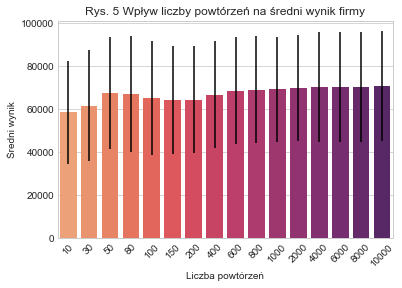

In [31]:
sns.barplot(x = 'Liczba powtórzeń', y = 'Średni wynik', yerr = odchy_stand, data = df,
           palette = 'flare',
           capsize = 1,             
           saturation = 10,             
           errcolor = 'gray', errwidth = 5,  
           ci = 'sd'
           )
plt.title('Rys. 5 Wpływ liczby powtórzeń na średni wynik firmy')
plt.xticks(rotation=45)
plt.show()

### 4.4.3 Wykres przedstawiający współczynnik zmienności dla danej liczby powtórzeń w symulacji
Współczynnik zmienności służy do badania stopnia zróżnicowania wartości zmiennej. Im wyższa wartość współczynnika, tym większe zróżnicowanie cechy, co świadczy o niejednorodności badanej populacji. Na naszym wykresie możemy zauważyć, że od liczby 4000 powtórzeń następuje stabilizacja cv, czego nie można powiedzieć przy mniejszej liczbie powtórzeń w danej symulacji.


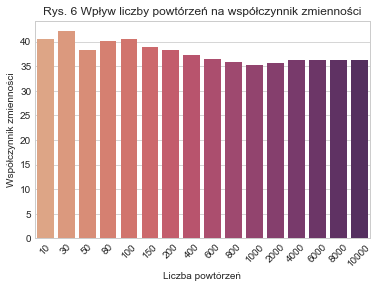

In [32]:
sns.barplot(x = 'Liczba powtórzeń', y = 'Współczynnik zmienności', data = df,
           palette = 'flare'
           )
plt.title('Rys. 6 Wpływ liczby powtórzeń na współczynnik zmienności')
plt.xticks(rotation=45)
plt.show()

Na podstawie wyżej przedstawionych wykresów (Rys. 5 i Rys. 6) możemy zauważyć, iż pewna powtarzalność, jeśli chodzi o średni wynik końcowy, odchylenie standardowe i współczynnik zmienności, występuje przy minimum 4000 powtórzeń w symulacji.

## 5. Wnioski i zalecenia

Zastosowanie symulacji może usprawnić podejmowanie decyzji o wysokości składek, aby nie przekroczyć danego ryzyka bankructwa. Pozwala również sprawdzać, jak poszczególne decyzje biznesowe wpłynie na inne parametry związane z udzielaniem kredytów (np. zwiększenie nadwyżki pozwala zmniejszyć wysokość składek, przy zachowaniu danego ryzyka ruiny).
